In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)




In [42]:
df = pd.read_csv('../capstone-data/daily-merged.csv')

In [43]:
df.rename(columns={'Unnamed: 0':'date'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.sort_index(inplace=True)

In [44]:
df= df.asfreq('d')

In [45]:
df.index.duplicated().sum()

0

In [46]:
assert (df.isna().sum()==0).all()

In [47]:
df.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='date', length=7639, freq='D')

In [48]:
df.head()

,bus,rail_boardings,total_rides,prcp,tmax,tmin,gas_open,gas_close,gas_volume,3_mo,6_mo,1_yr,2_yr,3_yr,5_yr,7_yr,10_yr,20_yr,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,total_daily_doses,total_daily_cum,first_dose_daily,first_dose_cum,first_dose_percent_pop,vax_series_completed_daily,vax_series_cum,vax_series_percent,crash_occurrences,damage_indicator
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,297192.0,126455.0,423647.0,0.0,26.0,13.0,0.794,0.7950,14697.0,5.87,5.58,5.11,4.87,4.82,4.76,4.97,4.92,5.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-02,780827.0,501952.0,1282779.0,0.0,21.0,7.0,0.794,0.7950,14697.0,5.87,5.58,5.11,4.87,4.82,4.76,4.97,4.92,5.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-03,824923.0,536432.0,1361355.0,0.0,28.0,7.0,0.799,0.8100,10219.0,5.69,5.44,5.04,4.92,4.92,4.94,5.18,5.14,5.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-04,870021.0,550011.0,1420032.0,0.0,32.0,23.0,0.815,0.8186,17869.0,5.37,5.20,4.82,4.77,4.78,4.82,5.07,5.03,5.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-01-05,890426.0,557917.0,1448343.0,0.0,37.0,24.0,0.815,0.8205,18617.0,5.12,4.98,4.60,4.56,4.57,4.66,4.93,4.93,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

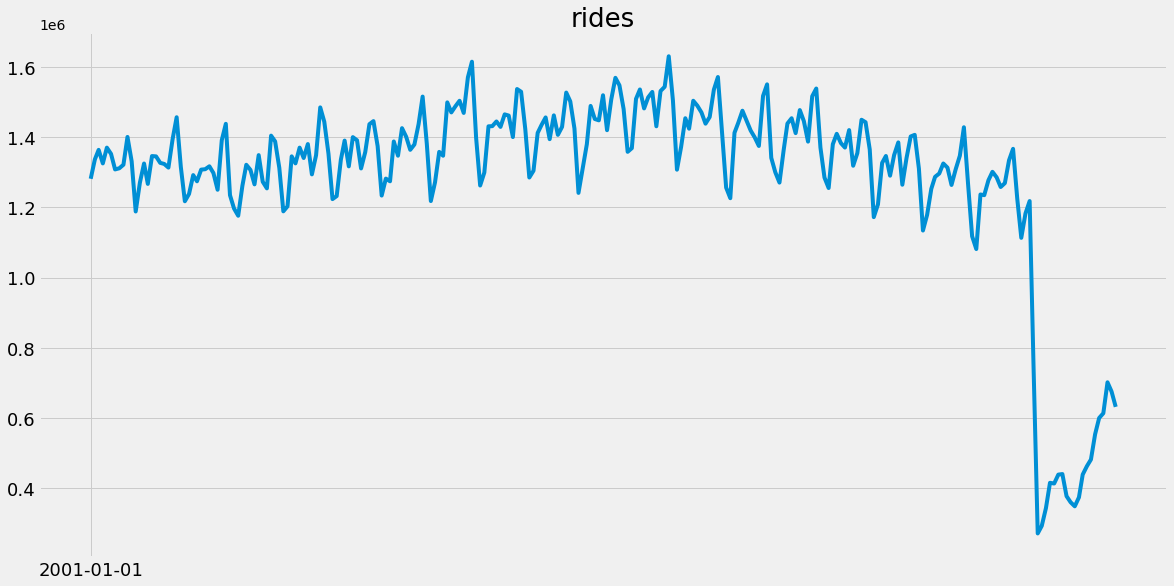

In [101]:
plot_series(df.resample('MS',closed='left').mean(),['total_rides'], title='rides',steps=2000)

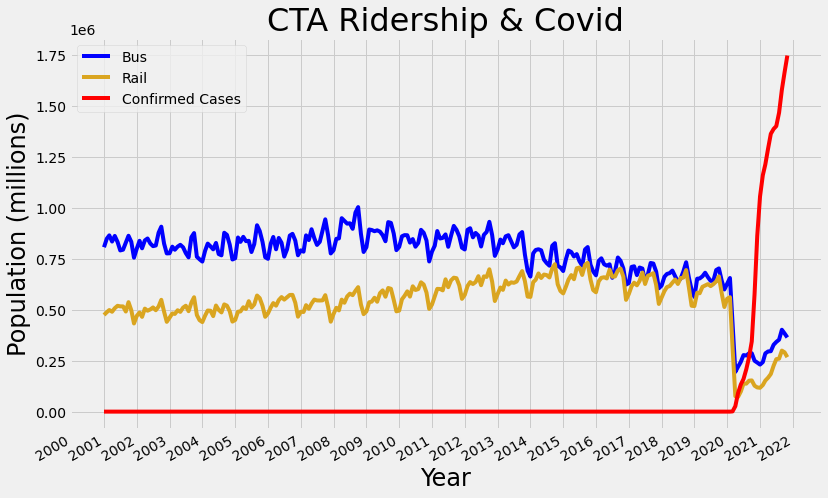

In [102]:
plt.figure(figsize=(12,8))

plt.plot(df['bus'].resample('MS',closed='left').mean(),label='Bus',color='blue',)
plt.plot(df['rail_boardings'].resample('MS',closed='left').mean(),label='Rail',color='goldenrod',);
plt.plot(df['ConfirmedCases'].resample('MS',closed='left').mean(),label='Confirmed Cases',color='red',)

plt.title('CTA Ridership & Covid',size=32)
plt.xlabel('Year',size=24)
plt.ylabel('Population (millions)',size=24)
plt.legend();

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


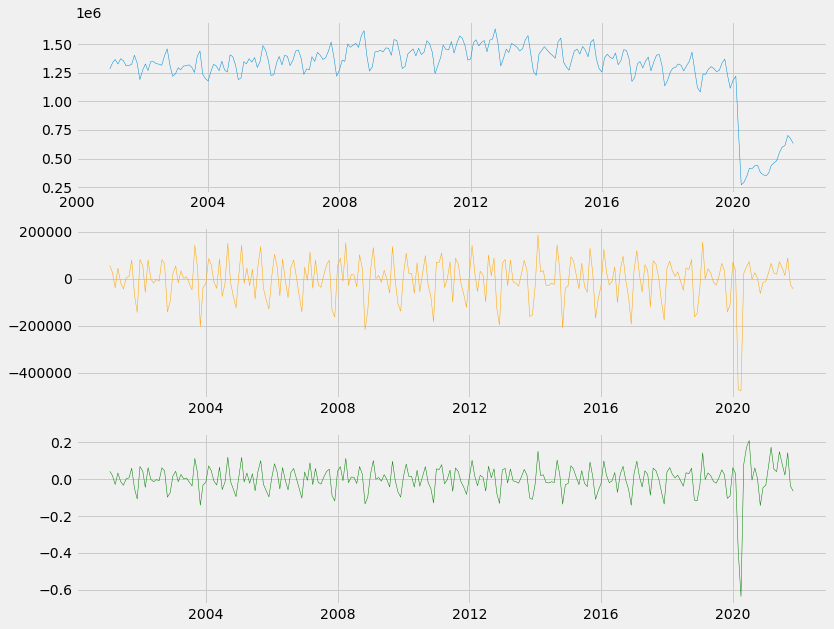

In [103]:
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.plot(df['total_rides'].resample('MS',closed='left').mean(),label='norm',linewidth=.5)
plt.subplot(3,1,2)
plt.plot(df['total_rides'].resample('MS',closed='left').mean().diff(),label='diff', color='orange',linewidth=.5)
plt.subplot(3,1,3)
plt.plot(df['total_rides'].resample('MS',closed='left').mean().pct_change(),label='pct_change', color='green',linewidth=.5);

In [109]:
rides = df[['total_rides']].resample('MS',closed='left').mean().copy()

In [54]:
rail = df[['rail_boardings']].copy()
bus = df[['bus']].copy()

In [55]:
rides.shape

(7639, 1)

# Total Rides

In [104]:
decomp = seasonal_decompose(df['total_rides'].resample('MS',closed='left').mean().dropna())


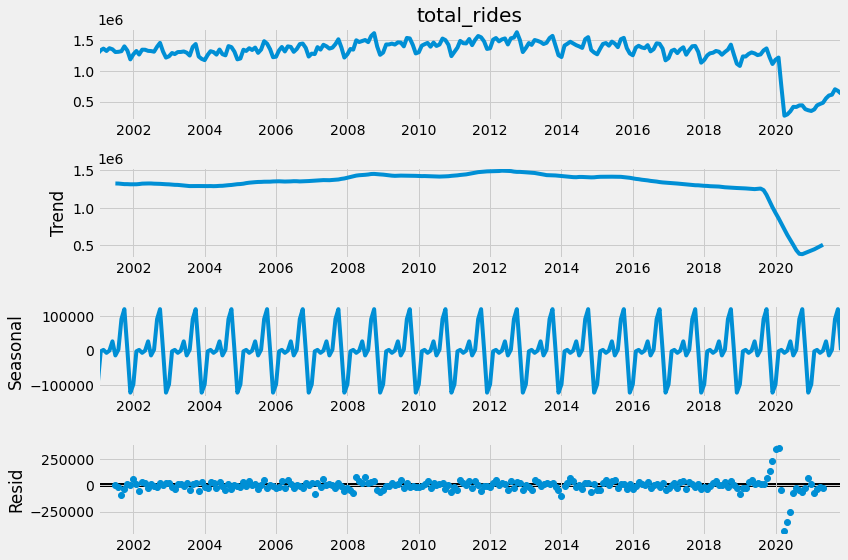

In [105]:
rcParams['figure.figsize'] = (12, 8)
decomp.plot();

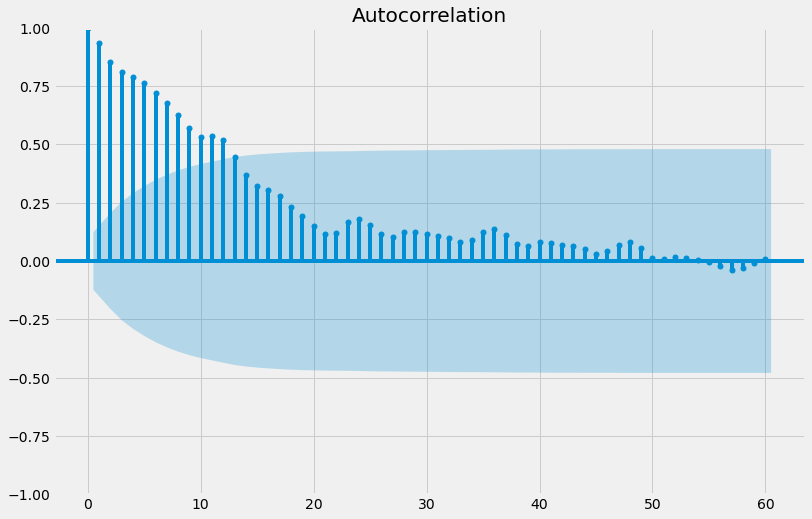

In [106]:
plot_acf(rides['total_rides'].resample('MS',closed='left').mean(),lags=60);

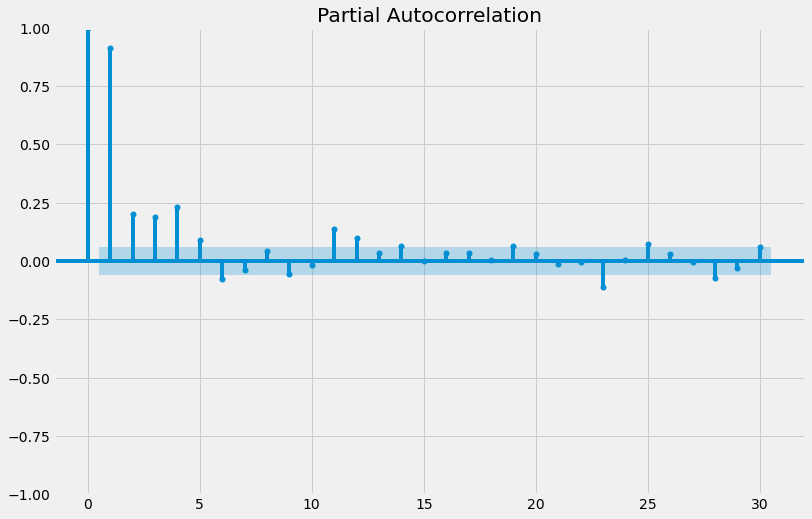

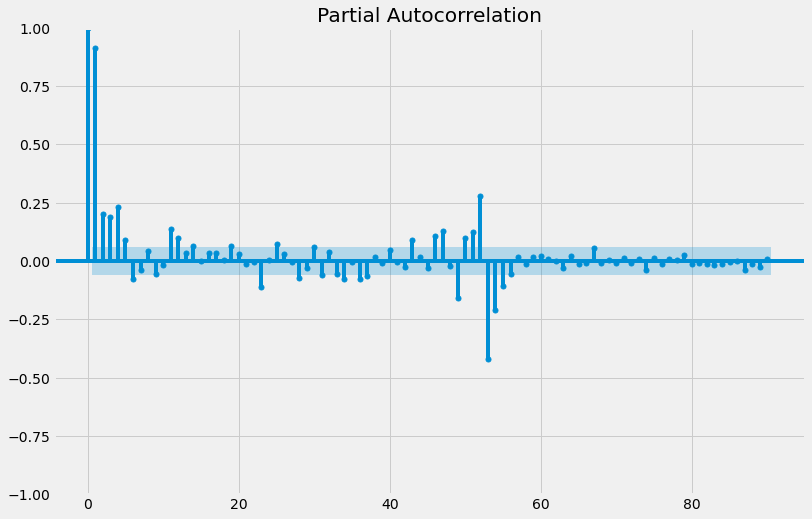

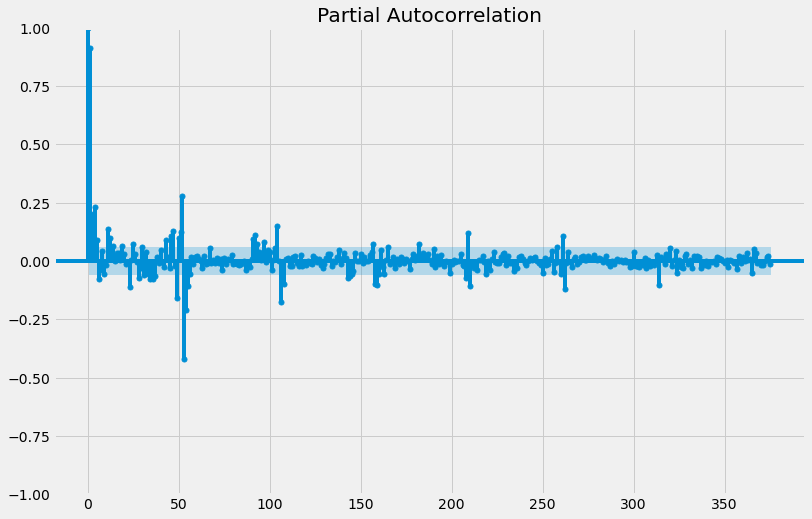

In [108]:
plot_pacf(rides['total_rides'].resample('W',closed='left').mean(), lags=30,method='ywm');
plot_pacf(rides['total_rides'].resample('W',closed='left').mean(), lags=90,method='ywm');
plot_pacf(rides['total_rides'].resample('W',closed='left').mean(), lags=375,method='ywm');


# Bus Rides

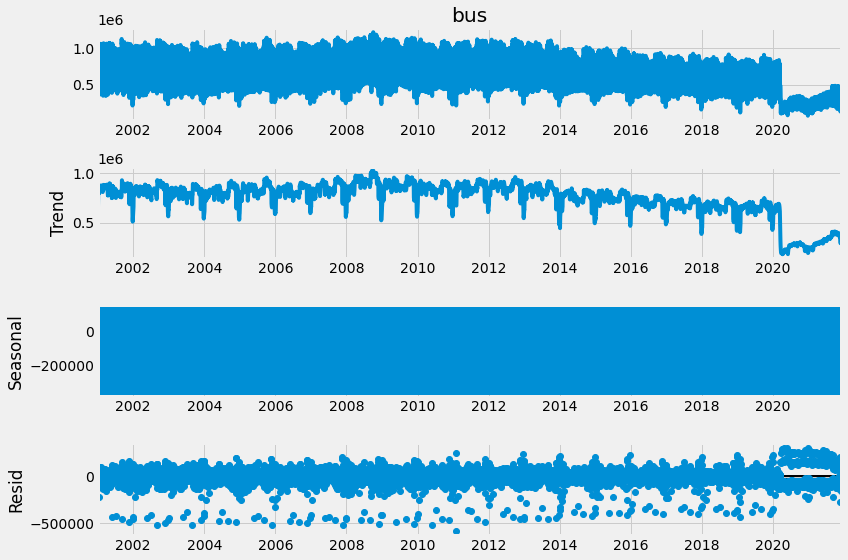

In [60]:
decomp = seasonal_decompose(bus['bus'])
decomp.plot();

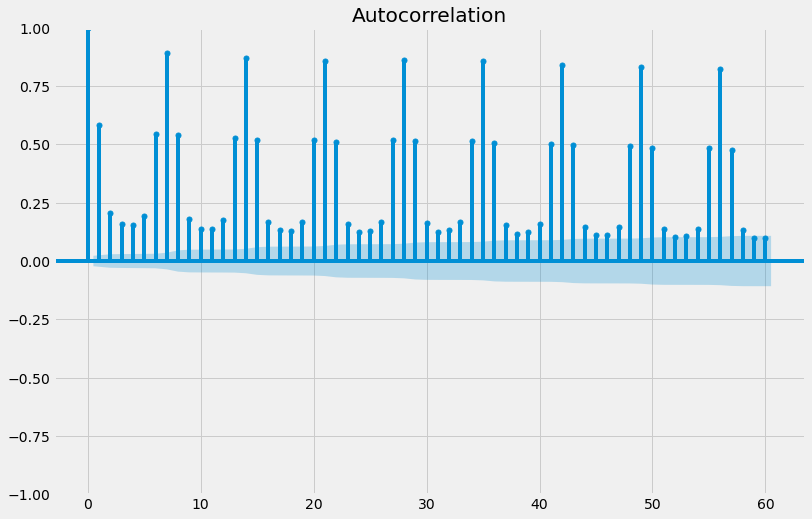

In [61]:
plot_acf(bus['bus'],lags=60);

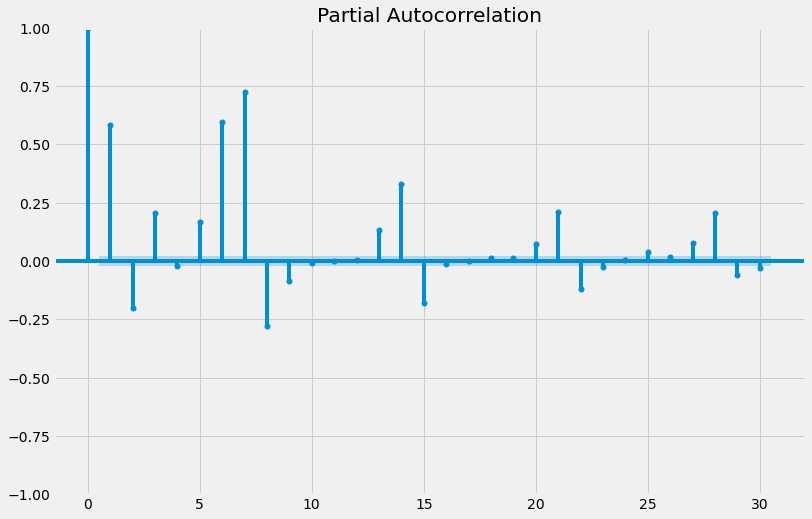

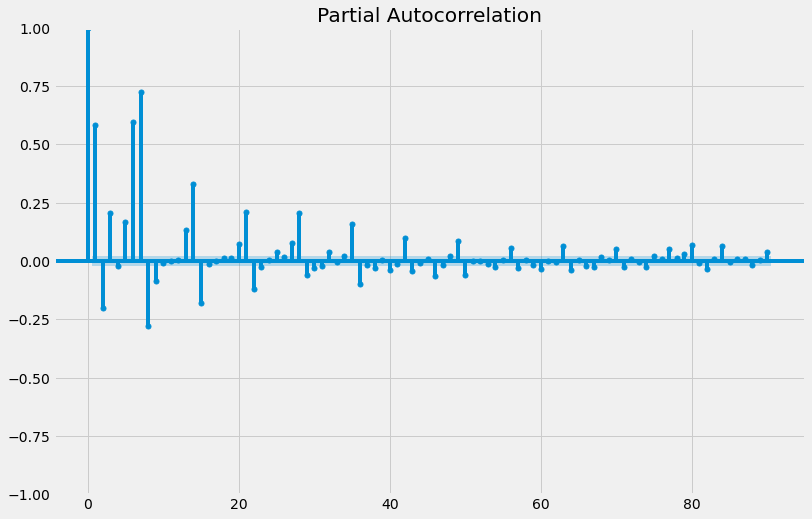

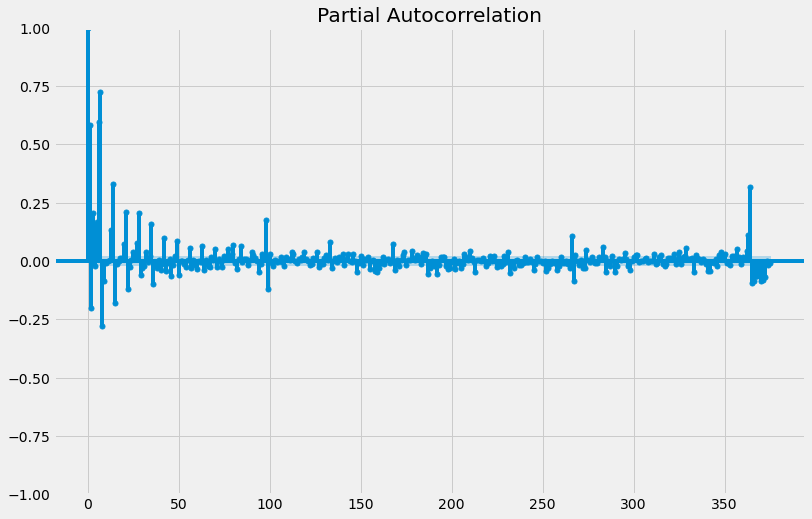

In [62]:
plot_pacf(bus['bus'], lags=30,method='ywm');
plot_pacf(bus['bus'], lags=90,method='ywm');
plot_pacf(bus['bus'], lags=375,method='ywm');


# Rail Rides

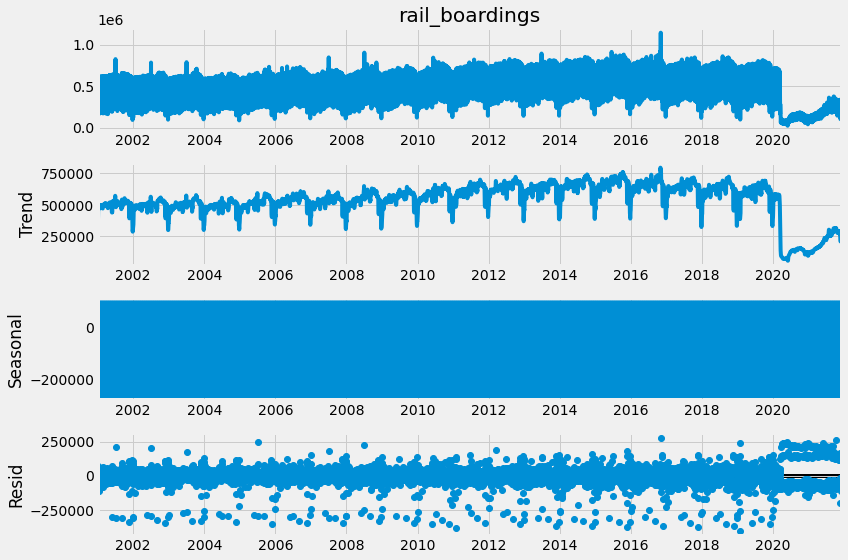

In [63]:
decomp = seasonal_decompose(rail['rail_boardings'])
decomp.plot();

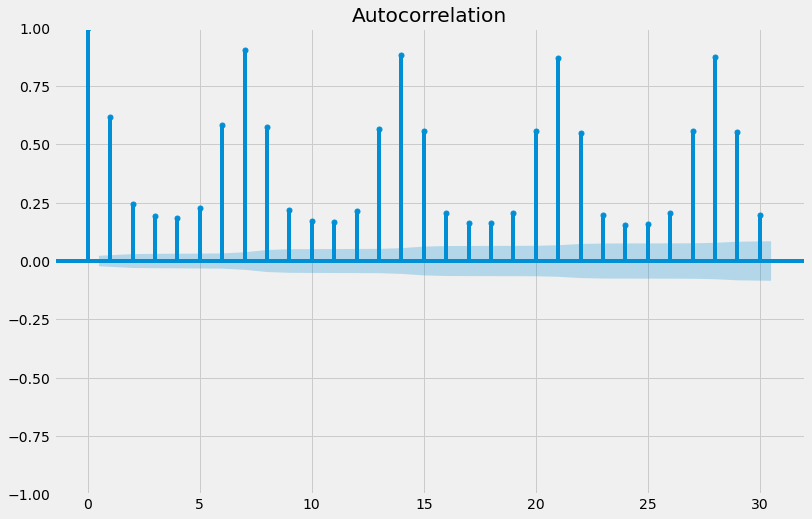

In [64]:
plot_acf(rail['rail_boardings'],lags=30);

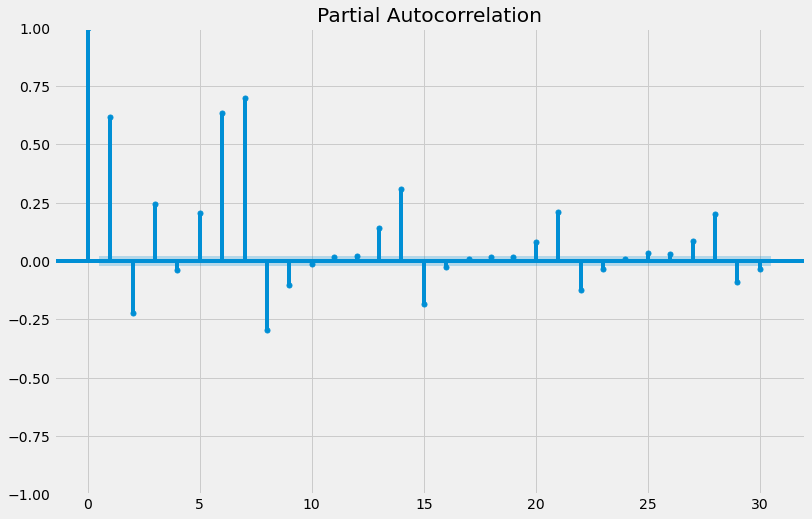

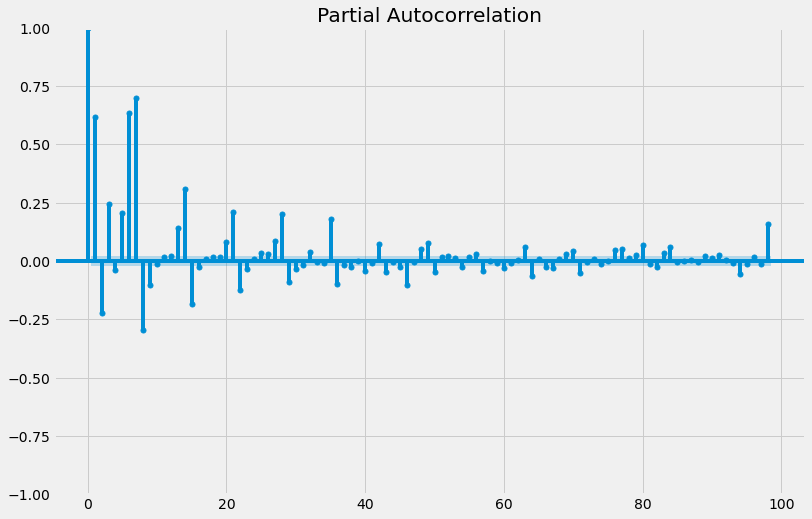

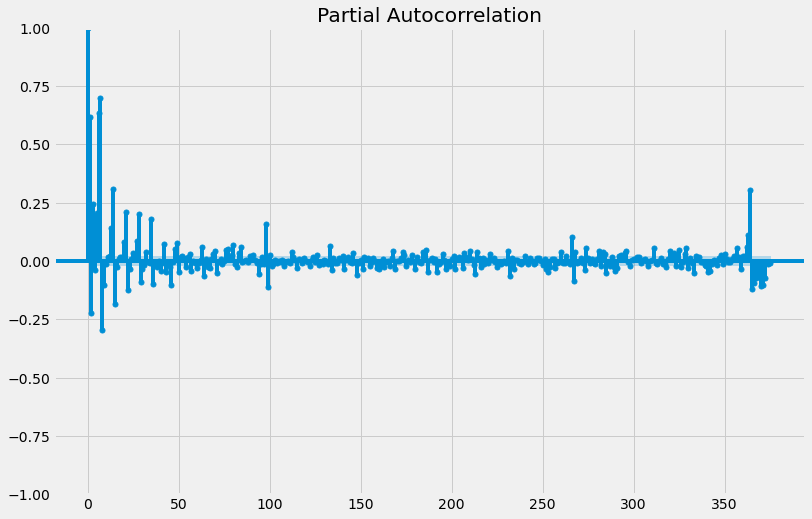

In [65]:
plot_pacf(rail['rail_boardings'], lags=30,method='ywm');
plot_pacf(rail['rail_boardings'], lags=98,method='ywm');
plot_pacf(rail['rail_boardings'], lags=375,method='ywm');


Ridership among both bus and rail is practically identical in trend and seasonality. We can see clear seasonality with weekly peaks.

In [140]:
test = rides.copy()
test['3_lags'] = test['total_rides'].shift(350)
test.corr()

,total_rides,3_lags
total_rides,1.0,NaN
3_lags,NaN,NaN


In [141]:
rides['lag_1'] = rides['total_rides'].shift(1)
rides['lag_2'] = rides['total_rides'].shift(2)
rides['lag_3'] = rides['total_rides'].shift(3)
rides['lag_4'] = rides['total_rides'].shift(4)
rides['lag_5'] = rides['total_rides'].shift(5)
rides['lag_6'] = rides['total_rides'].shift(6)

rides['time'] = range(0, rides.shape[0])

In [142]:
rides.corr()

,total_rides,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,time
total_rides,1.000000,0.944863,0.871745,0.836961,0.826065,0.811715,0.782091,-0.432002
lag_1,0.944863,1.000000,0.943594,0.868871,0.832656,0.821369,0.806485,-0.422657
lag_2,0.871745,0.943594,1.000000,0.942376,0.865716,0.828537,0.816968,-0.413486
lag_3,0.836961,0.868871,0.942376,1.000000,0.941229,0.862683,0.824639,-0.404344
lag_4,0.826065,0.832656,0.865716,0.941229,1.000000,0.939488,0.858409,-0.393872
lag_5,0.811715,0.821369,0.828537,0.862683,0.939488,1.000000,0.937546,-0.382869
lag_6,0.782091,0.806485,0.816968,0.824639,0.858409,0.937546,1.000000,-0.370949
time,-0.432002,-0.422657,-0.413486,-0.404344,-0.393872,-0.382869,-0.370949,1.000000


In [164]:
X_train,X_test,y_train,y_test = train_test_split(rides.drop(columns={'total_rides',}),rides['total_rides'],test_size=.2,shuffle=False)

In [165]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

,const,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,time
date,,,,,,,,
2001-01-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2001-02-01,1.0,1.281782e+06,NaN,NaN,NaN,NaN,NaN,1
2001-03-01,1.0,1.337077e+06,1.281782e+06,NaN,NaN,NaN,NaN,2
2001-04-01,1.0,1.364218e+06,1.337077e+06,1.281782e+06,NaN,NaN,NaN,3
2001-05-01,1.0,1.325571e+06,1.364218e+06,1.337077e+06,1281782.0,NaN,NaN,4


In [166]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]


lm = sm.OLS(y_train,X_train)

lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_rides   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     28.25
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.88e-26
Time:                        02:57:15   Log-Likelihood:                -2431.3
No. Observations:                 194   AIC:                             4879.
Df Residuals:                     186   BIC:                             4905.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.215e+05   1.19e+05      3.552      0.000    1.87e+05    6.56e+05
lag_1          0.7924      0.073     10.801      0.000       0.648       0.937
lag_2         -0.4174      0.094     -4.435      0.000      -0.603      -0.232
lag_3          0.1488      0.099      1.502      0.135      -0.047       0.344
lag_4          0.0067      0.099      0.068      0.946      -0.189       0.202
lag_5          0.1149      0.094      1.217      0.225      -0.071       0.301
lag_6          0.0372      0.075      0.499      0.619      -0.110       0.184
time         173.8514    105.226      1.652      0.100     -33.738     381.441
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.897
Skew:                          -0.066   Prob(JB):                        0.639
Kurtosis:                       2.694   Cond. No.                     8.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
metrics.r2_score(y_test,lm_results.predict(X_test))

0.634646597290937

In [169]:
metrics.mean_squared_error(y_test,lm_results.predict(X_test),squared=False)

244779.9985591595

Initial and basic testing shows we are off by just under 200,000 riders per day.

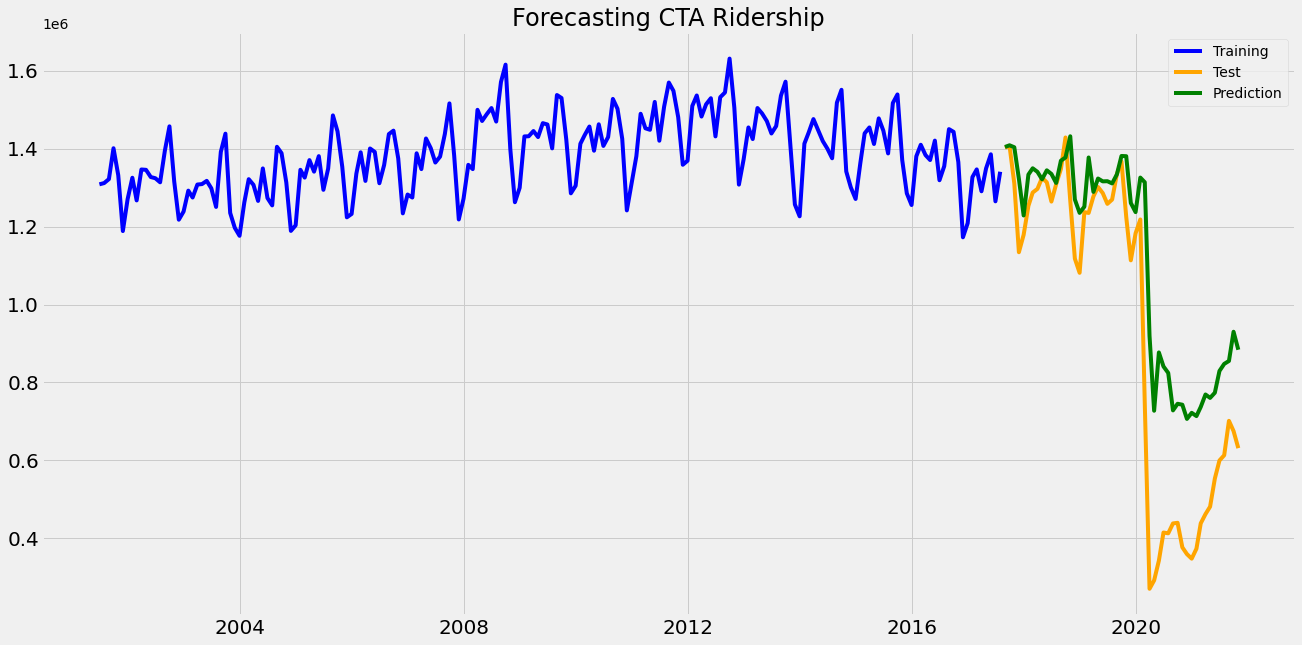

In [170]:
# Adapted from code by Hank Butler

plt.figure(figsize=(20,10))

plt.plot(y_train.index, y_train.values, color = 'blue',label='Training',)

plt.plot(y_test.index, y_test.values, color = 'orange',label='Test')

plt.plot(lm_results.predict(X_test), color = 'green',label='Prediction')
# Set label.
plt.title(label = 'Forecasting CTA Ridership', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend();

In [9]:
df.columns

Index(['bus', 'rail_boardings', 'total_rides', 'prcp', 'snow', 'snwd', 'tmax',
       'tmin', 'gas_open', 'gas_close', 'gas_volume', '3_mo', '6_mo', '1_yr',
       '2_yr', '3_yr', '5_yr', '7_yr', '10_yr', '20_yr', 'C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing', 'H6_Facial Coverings',
       'H7_Vaccination policy', 'H8_Protection of elderly people',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyLegacyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex', 'total_daily_doses',
       'total_daily_cum', 'first_dose_daily', 'first_dose_cum',
       'first_dose_per

In [10]:
X=df[['total_rides', 'prcp', 'snow', 'snwd', 'tmax',
       'tmin', 'gas_open', 'gas_close', 'gas_volume', '3_mo', '6_mo', '1_yr',
       '2_yr', '3_yr', '5_yr', '7_yr', '10_yr', '20_yr','H7_Vaccination policy', 'H8_Protection of elderly people',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex','total_daily_doses',
       'total_daily_cum', 'first_dose_daily', 'first_dose_cum',
       'first_dose_percent_pop', 'vax_series_completed_daily',
       'vax_series_cum', 'vax_series_percent', 'crash_occurrences',
       'damage_indicator', 'crash_occruences','StringencyLegacyIndex', 'GovernmentResponseIndex']]

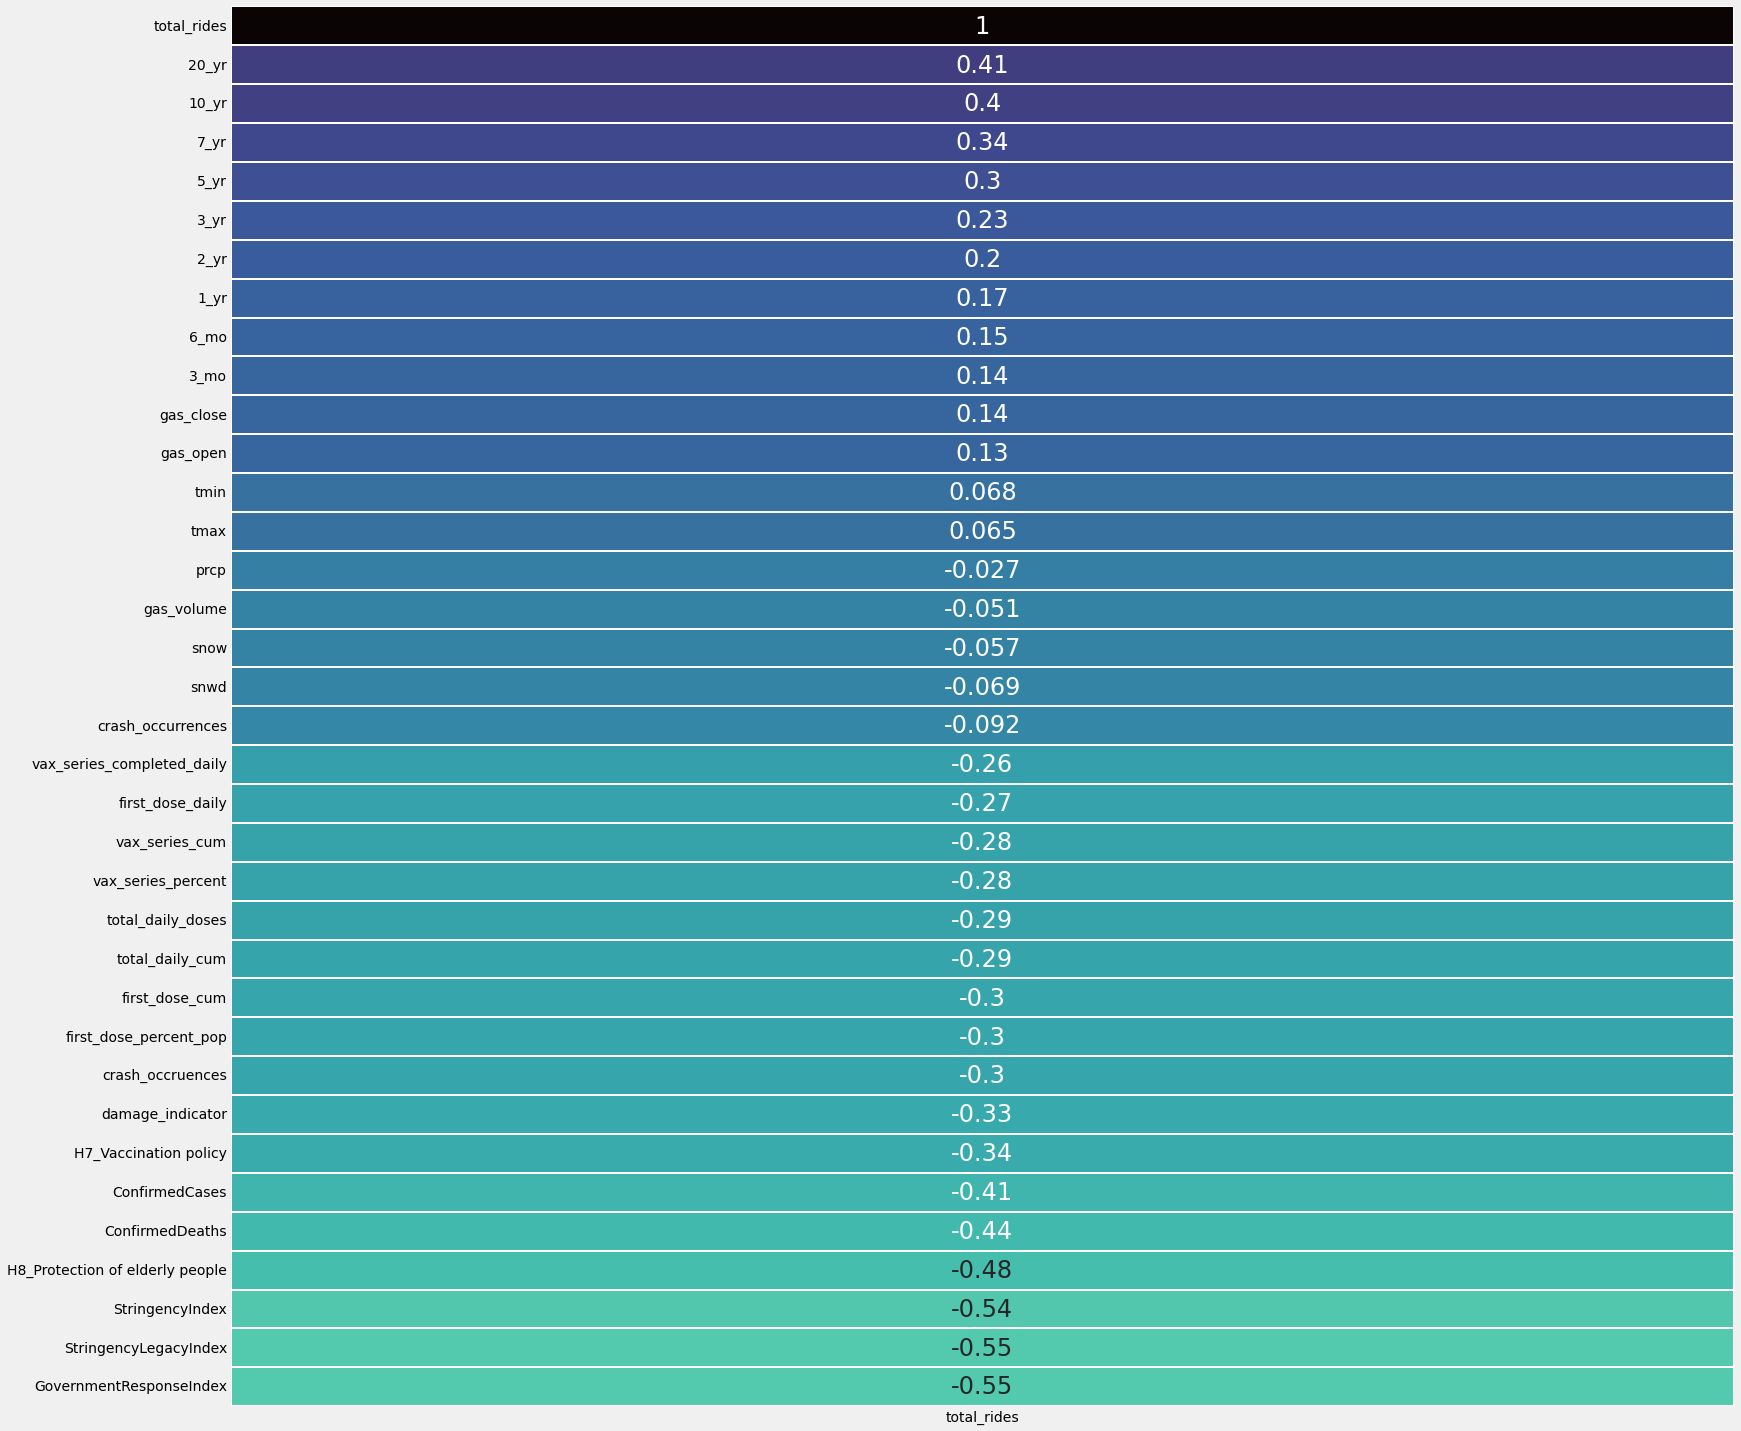

In [184]:
plt.figure(figsize=(24,24))
sns.heatmap(X.corr()[['total_rides']].sort_values(by='total_rides',ascending=False),vmin=-1,vmax=1,
            cmap= 'mako_r',linewidths=.1,annot=True, annot_kws={'fontsize':24},cbar=False);